<a href="https://colab.research.google.com/github/Shravani-std/Deep-Learning/blob/main/handling_weights_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

using xavier **method**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ushape.csv')
df.columns = ['X', 'Y', 'class']
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


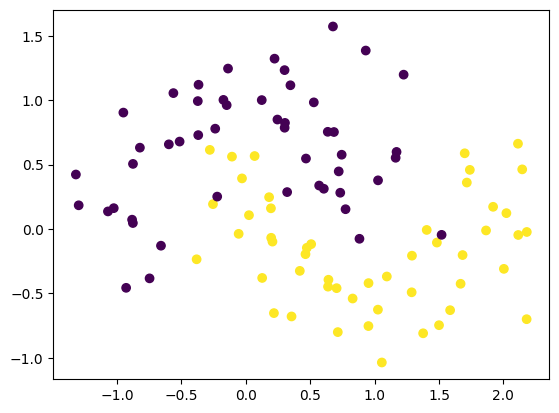

In [3]:
plt.scatter(df['X'], df['Y'], c = df['class'])

In [4]:
X = df.iloc[:, 0: 2].values
y = df.iloc[:, -1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential


In [11]:
# model = Sequential()
# model.add(Dense(10, activation='tanh', input_dim=2, kernel_initializer='GlorotUniform'))
# model.add(Dense(10, activation='tanh', kernel_initializer='GlorotUniform'))
# model.add(Dense(10, activation='tanh', kernel_initializer='GlorotUniform'))
# model.add(Dense(10, activation='tanh', kernel_initializer='GlorotUniform'))
# model.add(Dense(1,activation='sigmoid'))
model  = Sequential([
    Dense(10, activation='tanh', input_shape=(2,)),
    Dense(10, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(1, activation ='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.get_weights()

[array([[ 0.5844863 ,  0.00357032, -0.03826261,  0.6617785 , -0.0355227 ,
          0.5117169 , -0.38115925,  0.60487694,  0.680185  ,  0.41958588],
        [ 0.42131537,  0.43918055, -0.02623892, -0.60296696,  0.58845645,
         -0.04234105,  0.24520111, -0.36865613,  0.6147918 ,  0.13276863]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.16132891, -0.15789315, -0.11991864, -0.0600614 ,  0.01757574,
          0.29226166,  0.02643478, -0.34050858, -0.23583585, -0.25516066],
        [-0.34990093, -0.38760602, -0.30388695, -0.06166106,  0.07310981,
          0.25582653, -0.08935875,  0.06892449, -0.4264082 ,  0.12963516],
        [ 0.13977337, -0.04972056, -0.10346413,  0.47138357,  0.36261427,
         -0.40615726,  0.26920074, -0.09068853, -0.32782713, -0.31704035],
        [ 0.51690876,  0.24031901, -0.42181715,  0.32115895, -0.4494015 ,
          0.0490132 ,  0.32236165,  0.45478308, -0.46363628,  0.19619703],
        [ 0.07090

In [10]:
initial_weights = model.get_weights()

In [14]:
def xavier_init(fan_in, fan_out):
  limit = np.sqrt( 6 / (fan_in + fan_out))
  return np.random.uniform(-limit, limit, (fan_in, fan_out))


In [16]:
weights = []

# Layer 1: input_dim=2, units=10
weights.append(xavier_init(2, 10))   # W1
weights.append(np.zeros(10))         # b1

# Layer 2: input_dim=10, units=10
weights.append(xavier_init(10, 10))  # W2
weights.append(np.zeros(10))         # b2

# Layer 3: input_dim=10, units=10
weights.append(xavier_init(10, 10))  # W3
weights.append(np.zeros(10))         # b3

# Layer 4: input_dim=10, units=10
weights.append(xavier_init(10, 10))  # W4
weights.append(np.zeros(10))         # b4

# Output layer: input_dim=10, units=1
weights.append(xavier_init(10, 1))   # W5
weights.append(np.zeros(1))

In [17]:
model.set_weights(weights)

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X, y, epochs = 50, batch_size = 16, verbose = 1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5729 - loss: 0.6846
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6768 - loss: 0.6448 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7598 - loss: 0.6104 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7234 - loss: 0.5797 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7674 - loss: 0.5473 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8005 - loss: 0.4974 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8446 - loss: 0.4693 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8070 - loss: 0.4593 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8071 - loss: 0.4574 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8438 - loss: 0.4363 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8316 - loss: 0.4239 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8424 - loss: 0.4075 
Ep

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

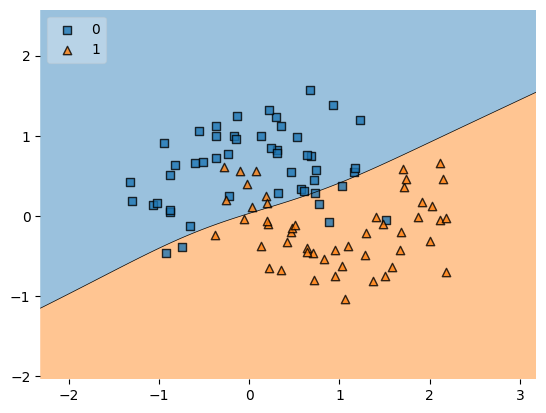

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

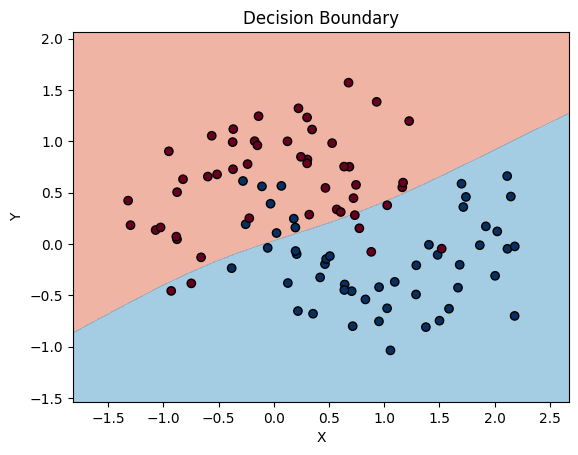

In [21]:

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid, verbose=0).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


plot_decision_boundary(model, X, y)
